In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [4]:
data20 = pd.read_csv('311_March_April2020.csv')
low_memory=False

In [5]:
data19 = pd.read_csv('311_March-April2019.csv')
low_memory=False 

In [6]:
data20.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45810033,03/13/2020 12:00:00 AM,03/13/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025.0,731 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.792597,-73.967706,"(40.79259692123458, -73.96770625127942)"
1,45810013,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11223.0,813 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.598134,-73.962817,"(40.5981342031965, -73.96281658993895)"
2,45789543,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11430.0,JFK BUILDING 59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.649150,-73.782833,"(40.64915023440445, -73.78283340618265)"
3,45775220,03/13/2020 12:00:00 AM,03/27/2020 10:30:11 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11235.0,2255 EMMONS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.583689,-73.944691,"(40.583689259183544, -73.94469056810513)"
4,45776994,03/13/2020 12:00:33 AM,03/13/2020 01:58:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10034.0,4892 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867210,-73.922534,"(40.86720968747772, -73.92253385348529)"


In [7]:
data19.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41949440,03/13/2019 12:00:00 AM,NaN,DEP,Department of Environmental Protection,FATF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41947950,03/13/2019 12:00:00 AM,03/27/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41936816,03/13/2019 12:00:00 AM,03/26/2019 07:53:13 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10029,334 EAST 100 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.786187,-73.943778,"(40.78618701810895, -73.94377846199588)"
3,41936820,03/13/2019 12:00:00 AM,03/14/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Mixed Use Building,11377,41-35 50 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745851,-73.914349,"(40.745851381123025, -73.91434915337972)"
4,41939629,03/13/2019 12:00:00 AM,03/15/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11225,426 EASTERN PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669515,-73.954367,"(40.669514860130114, -73.95436678857554)"


In [8]:
print ('shape 2020',data20.shape)
print ('shape 2019',data19.shape)

shape 2020 (137829, 41)
shape 2019 (229734, 41)


In [9]:
# question: What are the changes between 2019 and 2020 data in terms of quantities of non emargency complaints in NYC?
# the number of complaints has decreased significantly from 2019 to 2020

In [10]:
# columns
print ('2020 columns:',data20.columns)
print ('2019 columns:',data19.columns)

2020 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
2019 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Loca

In [11]:
data19['Agency'].value_counts()

NYPD     64013
HPD      46643
DSNY     38190
DOT      26634
DEP      15647
DOB      13716
DPR       6655
DOHMH     5734
DOF       5249
TLC       2780
DCA       1399
DHS        996
HRA        864
DFTA       739
DOE        160
EDC        116
DCAS        87
DOITT       51
ACS         28
TAX         23
NYCEM        6
DCP          3
TAT          1
Name: Agency, dtype: int64

In [12]:
data20['Agency'].value_counts()

NYPD     59168
HPD      27735
DOT      13971
DCA      12091
DEP       7707
DSNY      4278
DOB       4226
DOHMH     3372
DPR       3152
DHS       1316
TLC        468
EDC        273
DOE         62
DOITT       10
Name: Agency, dtype: int64

In [13]:
# it seems that both years the NYPD and HDP have the most complaints
#overall more seem to be in 2019 than 2020
# some agencies such as TAX, NYCEM, TAT, DCP don't seem to have any complaints in 2020

In [14]:
gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

In [15]:
gdf19 = gpd.GeoDataFrame(
    data19, geometry=gpd.points_from_xy(data19.Longitude, data19.Latitude))

In [16]:
gdf20.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,45810033,03/13/2020 12:00:00 AM,03/13/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025.0,731 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.792597,-73.967706,"(40.79259692123458, -73.96770625127942)",POINT (-73.96771 40.79260)
1,45810013,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11223.0,813 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,40.598134,-73.962817,"(40.5981342031965, -73.96281658993895)",POINT (-73.96282 40.59813)
2,45789543,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11430.0,JFK BUILDING 59,...,NaN,NaN,NaN,NaN,NaN,NaN,40.649150,-73.782833,"(40.64915023440445, -73.78283340618265)",POINT (-73.78283 40.64915)


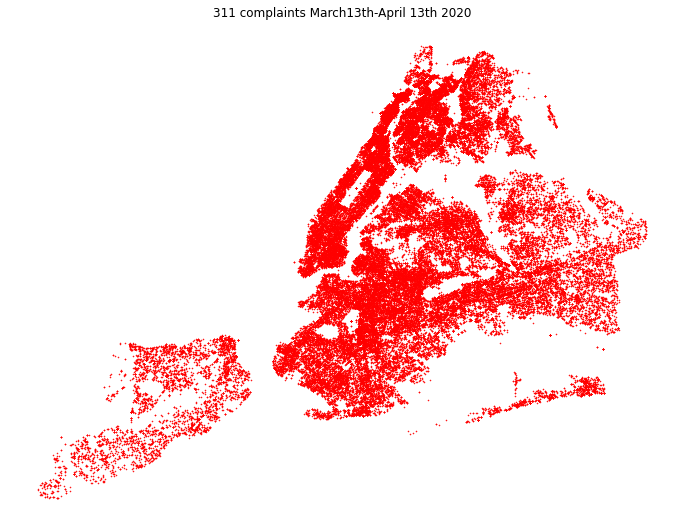

In [17]:
gdf20.plot( color='red',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2020')
plt.show()

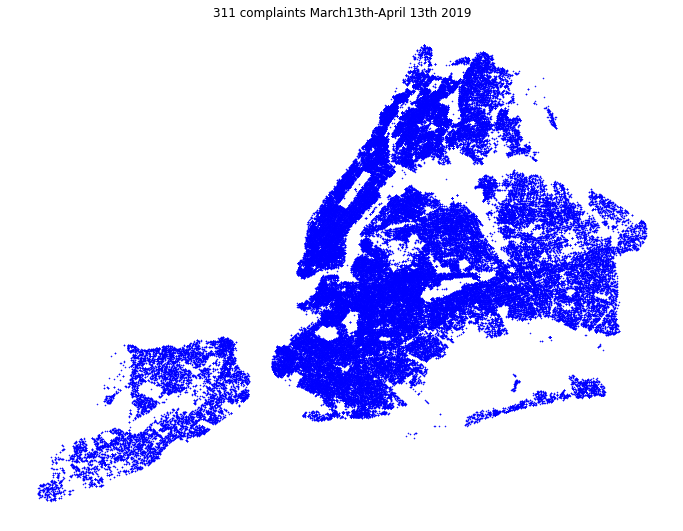

In [18]:
gdf19.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2019')
plt.show()

In [19]:
hpd19 = gdf19.loc[gdf19['Agency']=='HPD']
hpd20 = gdf20.loc[gdf20['Agency']=='HPD']

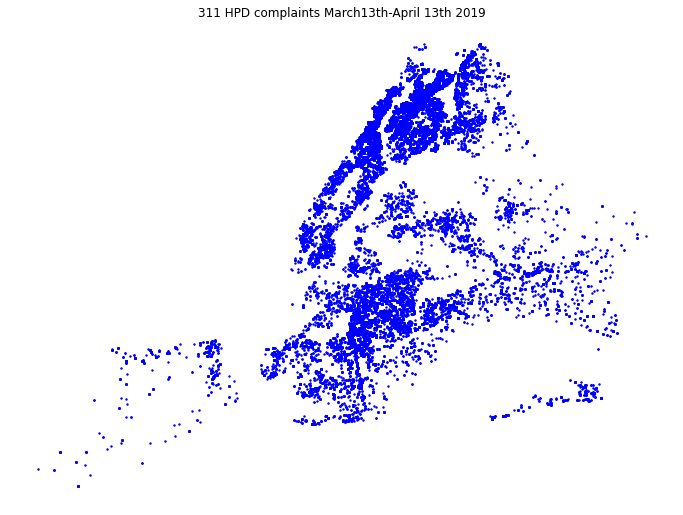

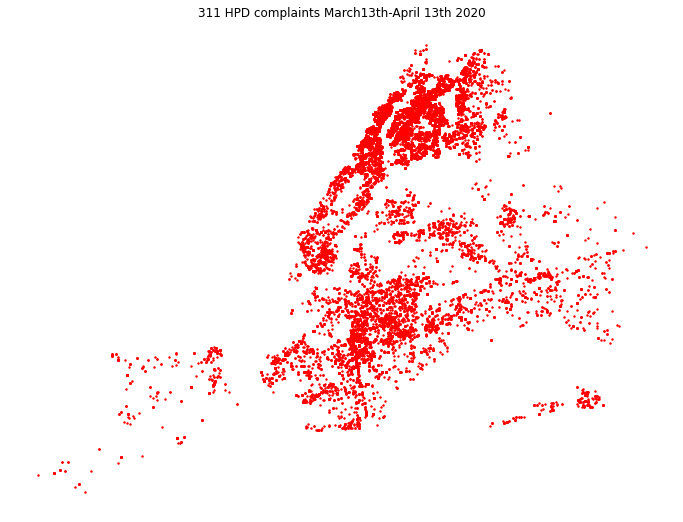

In [20]:
hpd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2019')
hpd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2020')
plt.show()

In [21]:
# Q: Which areas seem to see the most impact in terms of "most complaints"?
# A: Central Brooklyn, Harlem and the Bronx seem to have the most complaints both years


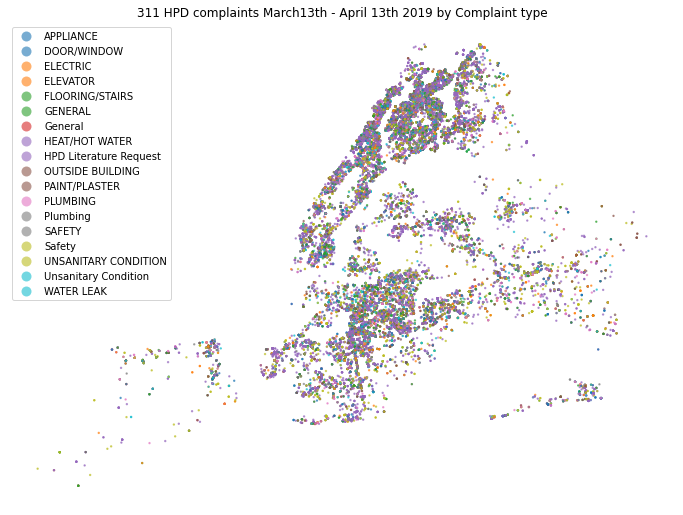

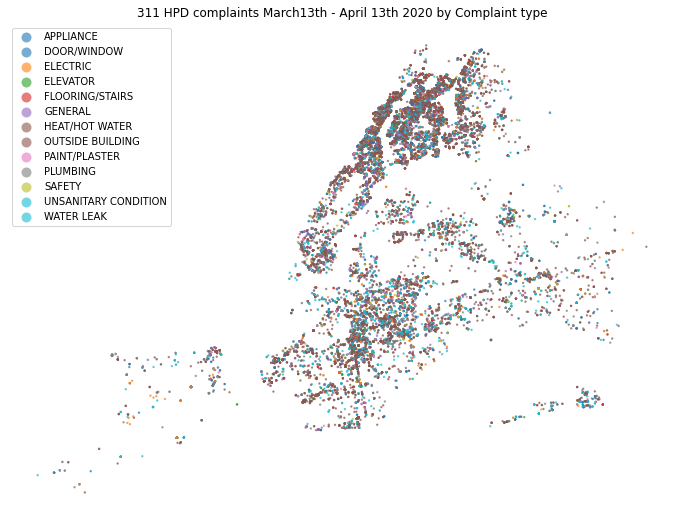

In [23]:
#2019
ax = hpd19.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
plt.title('311 HPD complaints March13th - April 13th 2019 by Complaint type')
plt.axis('off')
plt.show()

#2020
ax = hpd20.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
plt.title('311 HPD complaints March13th - April 13th 2020 by Complaint type')
plt.axis('off')
plt.show()

In [24]:
# Question: What information can we take away from these two maps?
# Answer: 

In [25]:
hpd19['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'PLUMBING', 'APPLIANCE', 'GENERAL',
       'PAINT/PLASTER', 'UNSANITARY CONDITION', 'OUTSIDE BUILDING',
       'ELECTRIC', 'SAFETY', 'FLOORING/STAIRS', 'DOOR/WINDOW',
       'WATER LEAK', 'HPD Literature Request', 'ELEVATOR',
       'Unsanitary Condition', 'General', 'Safety', 'Plumbing'],
      dtype=object)

In [26]:
hpd19_count_type = hpd19.groupby(['Complaint Type']).count()

In [27]:
hpd20_count_type = hpd20.groupby(['Complaint Type']).count()

In [28]:
hpd19_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,997,997,996,997,997,997,997,997,997,997,...,0,0,0,0,0,0,997,997,997,997
DOOR/WINDOW,3001,3001,2998,3001,3001,3001,3001,3000,3001,3001,...,0,0,0,0,0,0,3000,3000,3000,3001
ELECTRIC,1904,1904,1903,1904,1904,1904,1904,1904,1904,1904,...,0,0,0,0,0,0,1904,1904,1904,1904
ELEVATOR,90,90,90,90,90,90,90,90,90,90,...,0,0,0,0,0,0,90,90,90,90
FLOORING/STAIRS,2088,2088,2079,2088,2088,2088,2088,2088,2088,2088,...,0,0,0,0,0,0,2088,2088,2088,2088


In [29]:
hpd20_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,704,704,146,704,704,704,704,704,704,704,...,0,0,0,0,0,0,704,704,704,704
DOOR/WINDOW,1194,1194,338,1194,1194,1194,1194,1194,1194,1194,...,0,0,0,0,0,0,1194,1194,1194,1194
ELECTRIC,827,827,340,827,827,827,827,827,827,827,...,0,0,0,0,0,0,827,827,827,827
ELEVATOR,121,121,85,121,121,121,121,121,121,121,...,0,0,0,0,0,0,121,121,121,121
FLOORING/STAIRS,636,636,191,636,636,636,636,636,636,636,...,0,0,0,0,0,0,636,636,636,636


In [30]:
hpd19_count_type = hpd19_count_type['Unique Key']
hpd20_count_type = hpd20_count_type['Unique Key']

In [31]:
hpd19_count_type.head()

Complaint Type
APPLIANCE           997
DOOR/WINDOW        3001
ELECTRIC           1904
ELEVATOR             90
FLOORING/STAIRS    2088
Name: Unique Key, dtype: int64

In [32]:
hpd19_count_type = hpd19_count_type.sort_values()

hpd20_count_type = hpd20_count_type.sort_values()

In [33]:
hpd19_count_type.tail(5)

Complaint Type
DOOR/WINDOW              3001
PLUMBING                 4065
PAINT/PLASTER            4661
UNSANITARY CONDITION     6218
HEAT/HOT WATER          17742
Name: Unique Key, dtype: int64

In [34]:
hpd20_count_type.tail(5)

Complaint Type
DOOR/WINDOW              1194
PAINT/PLASTER            1499
PLUMBING                 2427
UNSANITARY CONDITION     2988
HEAT/HOT WATER          14840
Name: Unique Key, dtype: int64

In [35]:
#Assignment on Department of Environmental Protection 

In [41]:
dep19 = gdf19.loc[gdf19['Agency']=='DEP']
dep20 = gdf20.loc[gdf20['Agency']=='DEP']

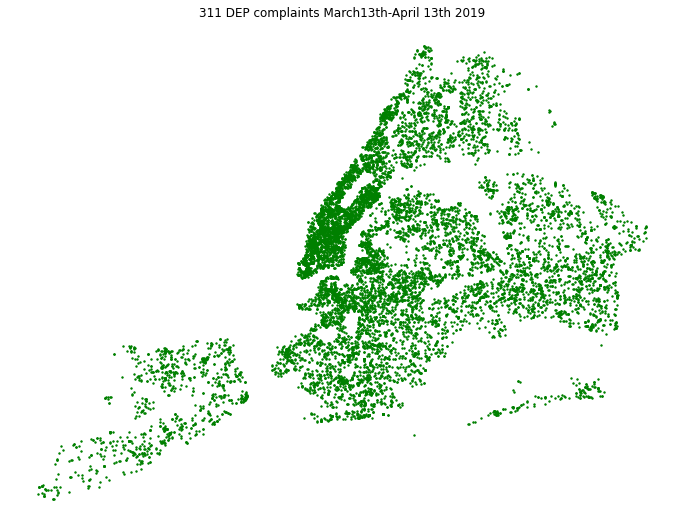

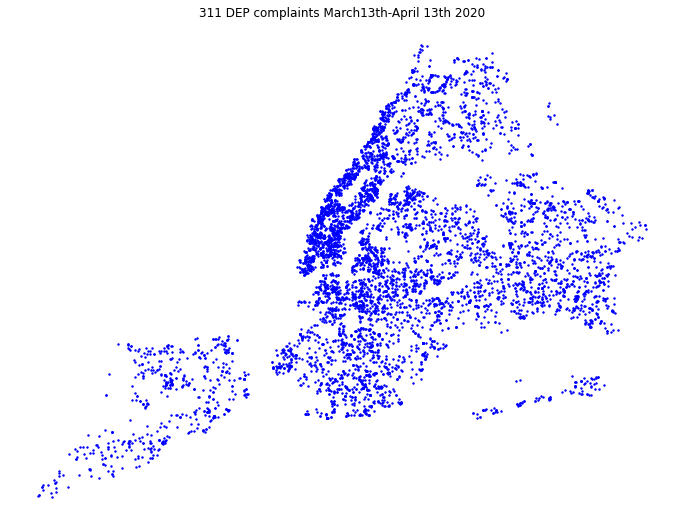

In [47]:
dep19.plot( color='green',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 DEP complaints March13th-April 13th 2019')
dep20.plot( color='blue',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 DEP complaints March13th-April 13th 2020')
plt.show()

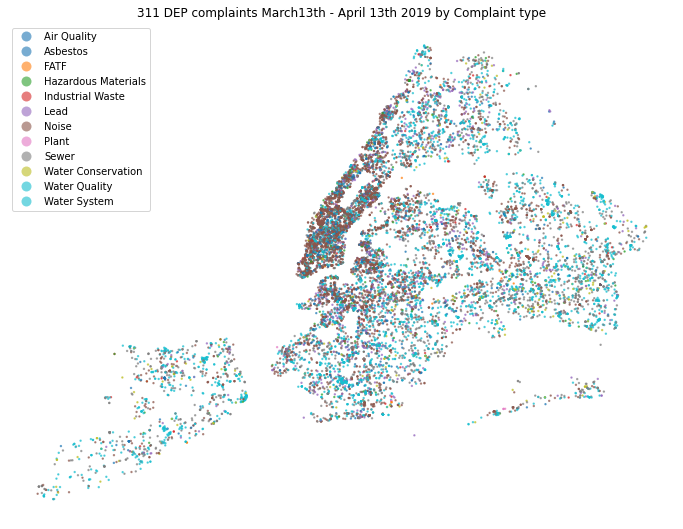

In [43]:
ax = dep19.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
plt.title('311 DEP complaints March13th - April 13th 2019 by Complaint type')
plt.axis('off')
plt.show()

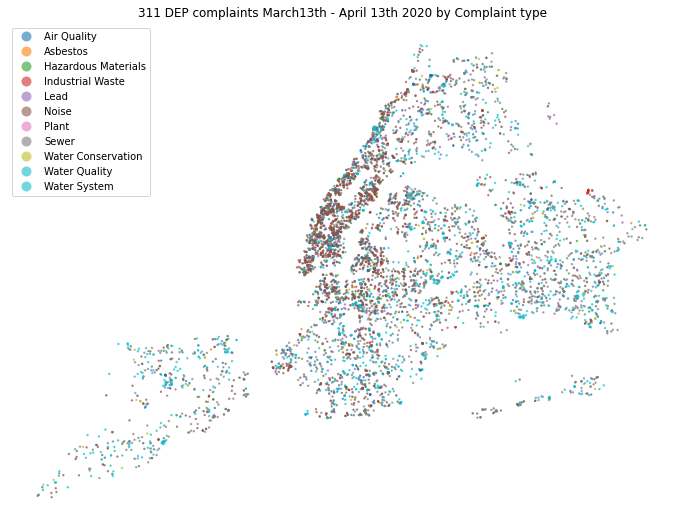

In [45]:
ax = dep20.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
plt.title('311 DEP complaints March13th - April 13th 2020 by Complaint type')
plt.axis('off')
plt.show()

In [48]:
dep19['Complaint Type'].unique()

array(['FATF', 'Noise', 'Water System', 'Air Quality', 'Sewer',
       'Hazardous Materials', 'Water Quality', 'Lead', 'Asbestos',
       'Water Conservation', 'Industrial Waste', 'Plant'], dtype=object)

In [50]:
dep19_count_type = dep19.groupby(['Complaint Type']).count()
dep20_count_type = dep20.groupby(['Complaint Type']).count()

In [51]:
dep19_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Air Quality,815,815,815,815,815,815,0,810,687,687,...,0,0,0,0,0,0,804,804,804,815
Asbestos,155,155,155,155,155,155,0,151,151,151,...,0,0,0,0,0,0,151,151,151,155
FATF,16,16,6,16,16,0,0,13,14,14,...,0,0,0,0,0,0,13,13,13,16
Hazardous Materials,234,234,220,234,234,234,0,229,185,185,...,0,0,0,0,0,0,227,227,227,234
Industrial Waste,103,103,97,103,103,103,0,100,75,75,...,0,0,0,0,0,0,100,100,100,103


In [52]:
dep20_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Air Quality,412,412,343,412,412,412,0,412,378,378,...,0,0,0,0,0,0,412,412,412,412
Asbestos,41,41,38,41,41,41,0,41,39,39,...,0,0,0,0,0,0,41,41,41,41
Hazardous Materials,95,95,76,95,95,95,0,95,85,85,...,0,0,0,0,0,0,95,95,95,95
Industrial Waste,36,36,13,36,36,36,0,36,29,29,...,0,0,0,0,0,0,36,36,36,36
Lead,288,288,244,288,288,288,0,288,288,288,...,0,0,0,0,0,0,288,288,288,288


In [53]:
dep19_count_type = dep19_count_type['Unique Key']
dep20_count_type = dep20_count_type['Unique Key']

In [54]:
dep19_count_type.head()

Complaint Type
Air Quality            815
Asbestos               155
FATF                    16
Hazardous Materials    234
Industrial Waste       103
Name: Unique Key, dtype: int64

In [55]:
dep19_count_type = dep19_count_type.sort_values()

dep20_count_type = dep20_count_type.sort_values()

In [56]:
dep19_count_type.tail(5)

Complaint Type
Air Quality      815
Lead             871
Sewer           2304
Water System    4448
Noise           6258
Name: Unique Key, dtype: int64